In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score,mean_squared_error,PredictionErrorDisplay
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('Crop_recommendation.csv')


df.shape

(2200, 8)

In [19]:
df_filter = df.drop(df[(df.label == 'blackgram') \
                       | (df.label == 'mungbean') \
                       | (df.label == 'lentil') \
                       | (df.label == 'pigeonpeas') \
                       | (df.label == 'coconut') \
                       | (df.label == 'kidneybeans') \
                       | (df.label == 'apple') \
                       | (df.label == 'muskmelon') \
                       | (df.label == 'watermelon') \
                       | (df.label == 'jute')].index)
df_filter = df_filter.drop(columns=['temperature','humidity','ph','rainfall'])
df_filter.head()

,N,P,K,label
0,90,42,43,rice
1,85,58,41,rice
2,60,55,44,rice
3,74,35,40,rice
4,78,42,42,rice


In [33]:
X = df_filter.drop(columns = ['label'])
y = df_filter['label'].to_numpy()

In [34]:
clf = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [35]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    print(accuracy_score(y[test], clf.predict(X.iloc[test])))

1.0
0.9916666666666667
0.9833333333333333
0.9833333333333333
0.9833333333333333
1.0
1.0
0.9916666666666667
1.0
0.975


[Text(0.8425925925925926, 0.9583333333333334, 'P <= 107.5\ngini = 0.917\nsamples = 1080\nvalue = [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]'),
 Text(0.8055555555555556, 0.875, 'K <= 65.0\ngini = 0.909\nsamples = 990\nvalue = [90, 90, 90, 90, 90, 90, 90, 0, 90, 90, 90, 90]'),
 Text(0.7685185185185185, 0.7916666666666666, 'P <= 69.5\ngini = 0.9\nsamples = 900\nvalue = [90, 90, 0, 90, 90, 90, 90, 0, 90, 90, 90, 90]'),
 Text(0.6111111111111112, 0.7083333333333334, 'K <= 35.5\ngini = 0.889\nsamples = 808\nvalue = [90, 90, 0, 90, 90, 0, 90, 0, 90, 88, 90, 90]'),
 Text(0.4074074074074074, 0.625, 'N <= 50.0\ngini = 0.839\nsamples = 550\nvalue = [5, 90, 0, 90, 5, 0, 90, 0, 90, 0, 90, 90]'),
 Text(0.16666666666666666, 0.5416666666666666, 'K <= 15.5\ngini = 0.678\nsamples = 275\nvalue = [0, 0, 0, 90, 5, 0, 90, 0, 90, 0, 0, 0]'),
 Text(0.07407407407407407, 0.4583333333333333, 'P <= 35.5\ngini = 0.117\nsamples = 96\nvalue = [0, 0, 0, 6, 0, 0, 0, 0, 90, 0, 0, 0]'),
 Text(0.037037037037037035, 

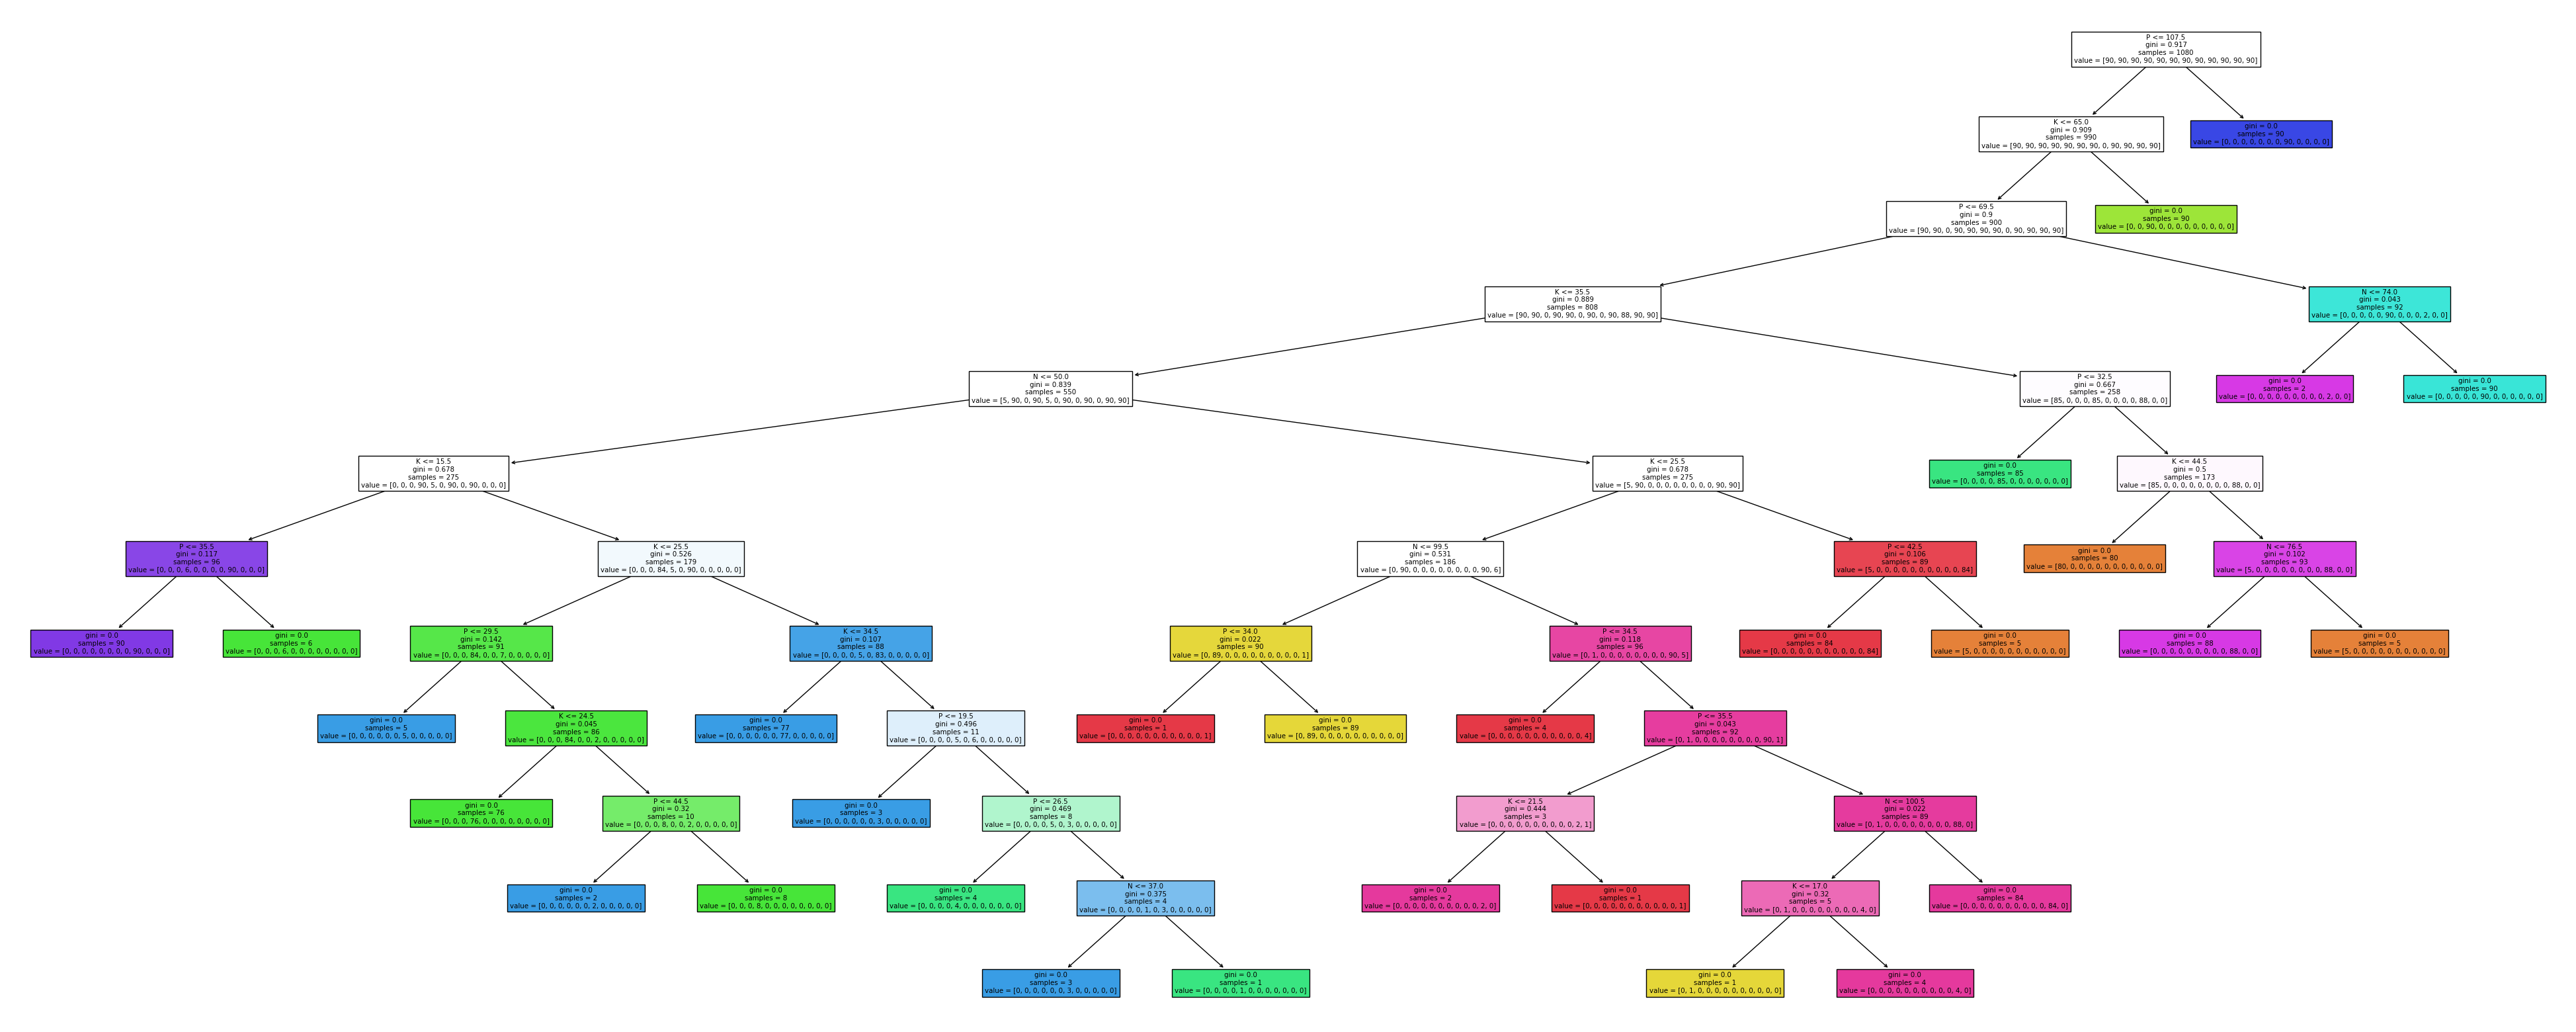

In [36]:
fig = plt.figure(figsize=(50,20))
tree.plot_tree(clf, 
               feature_names=df.columns,
               filled=True)

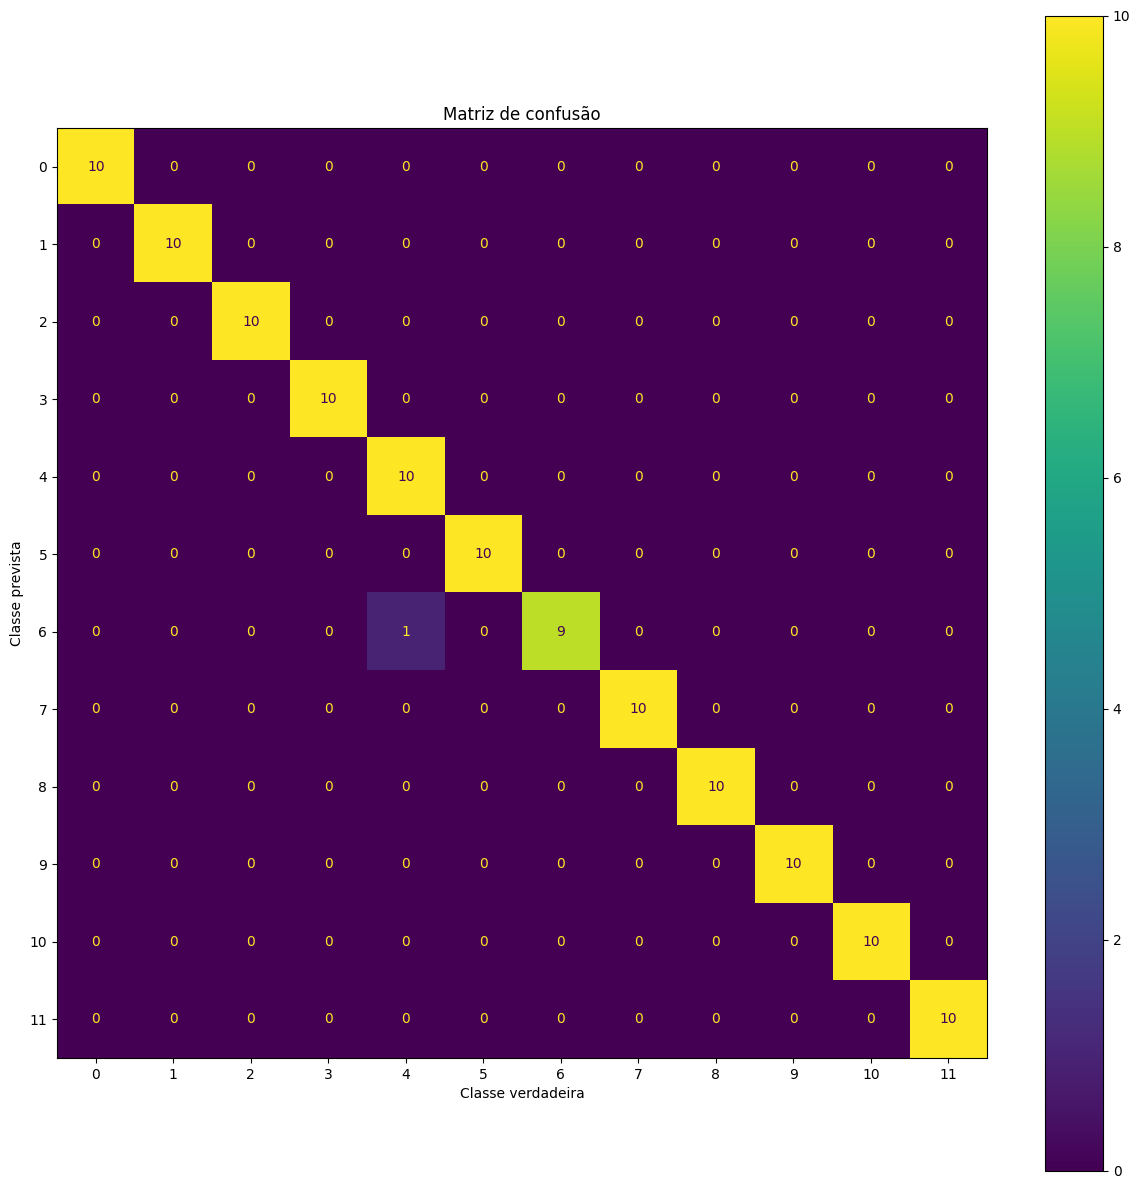

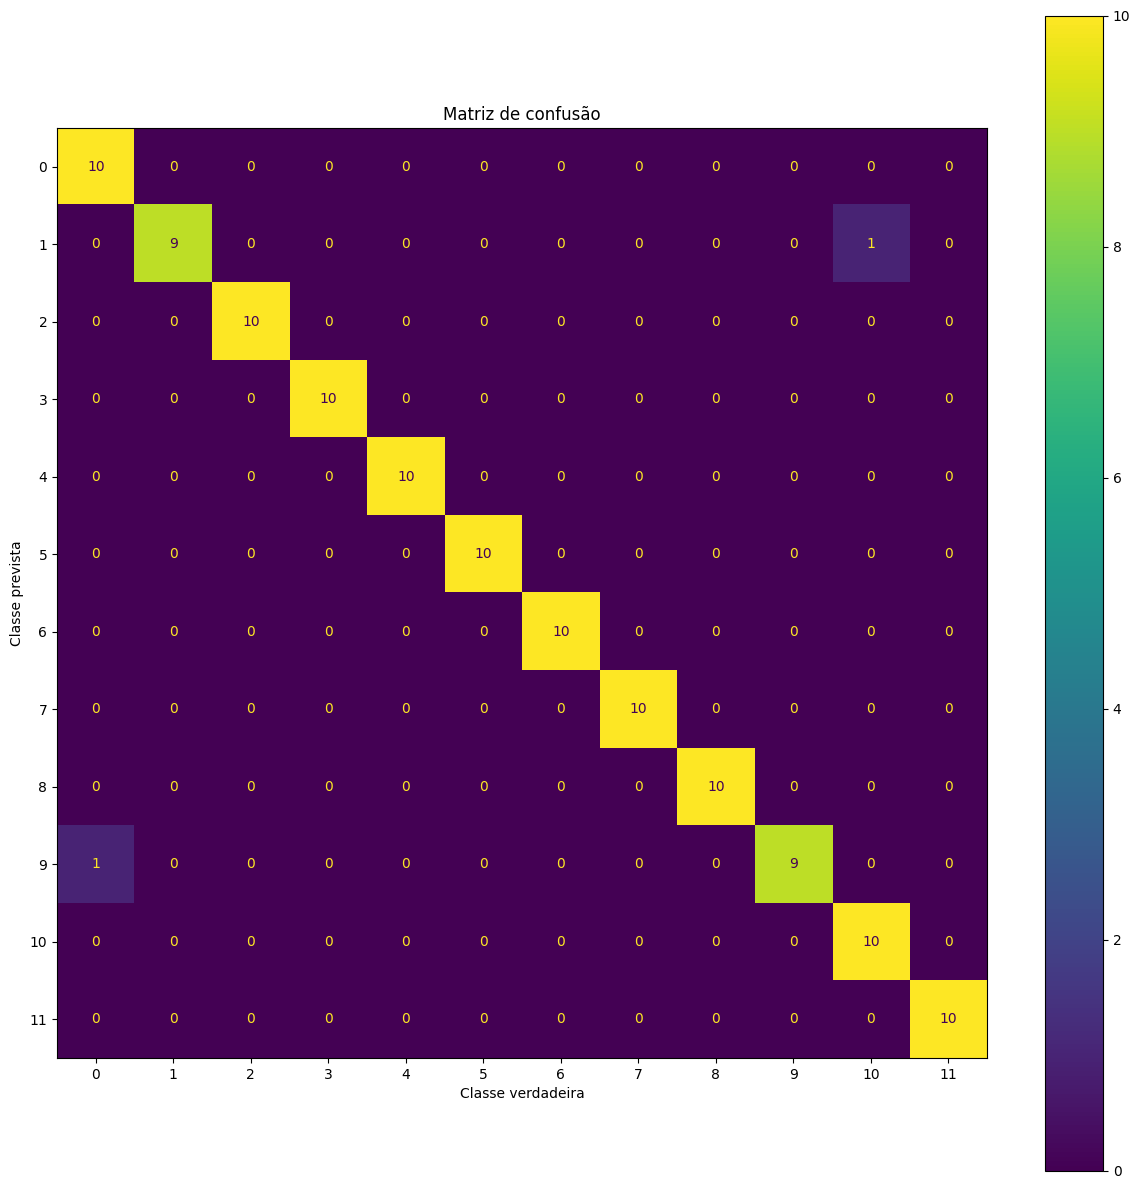

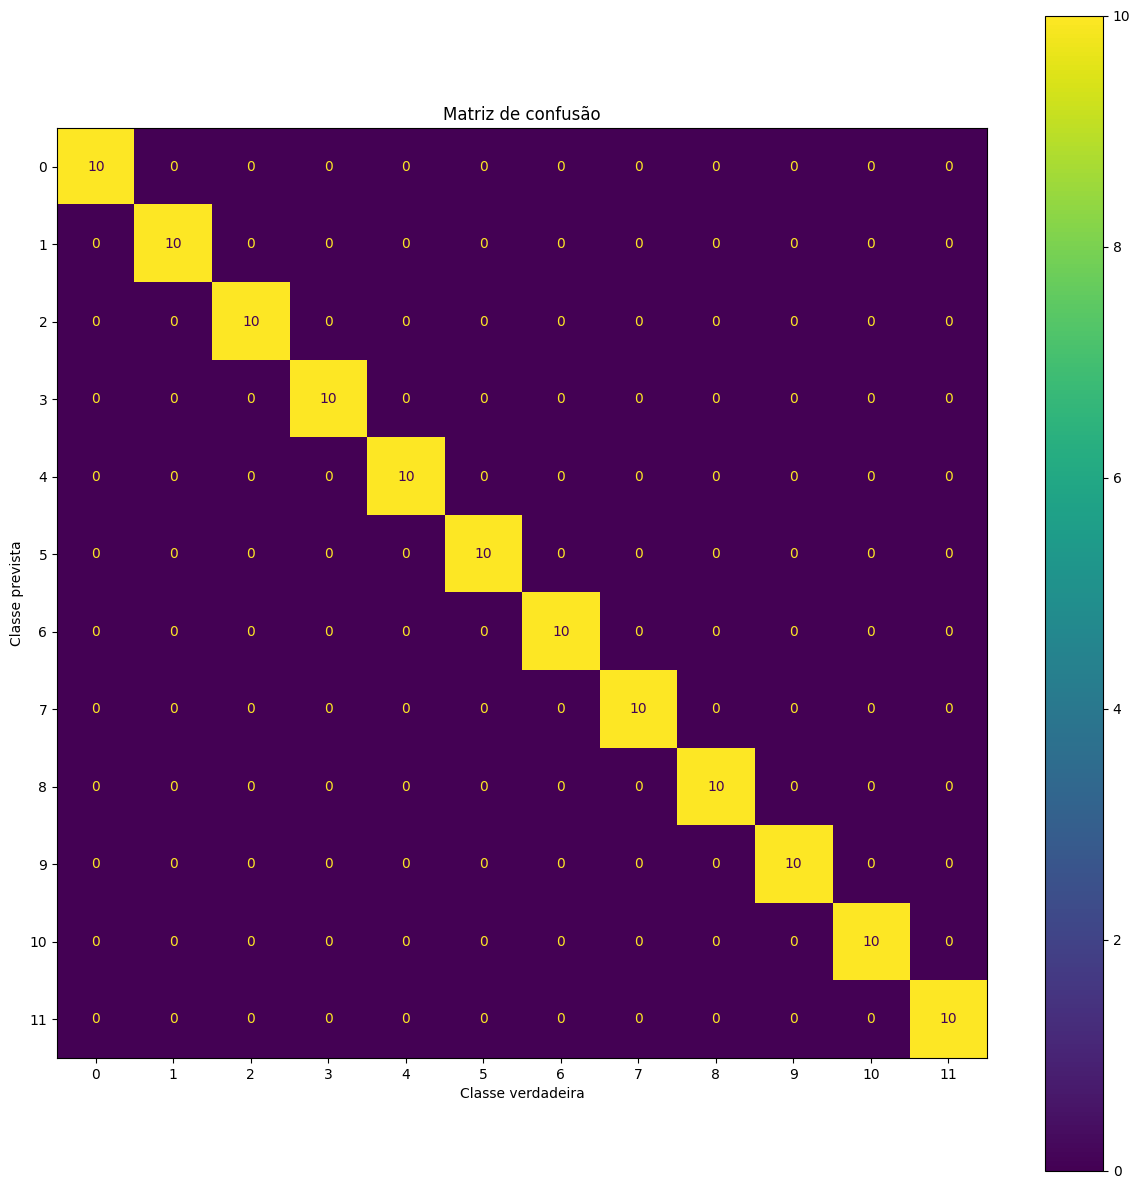

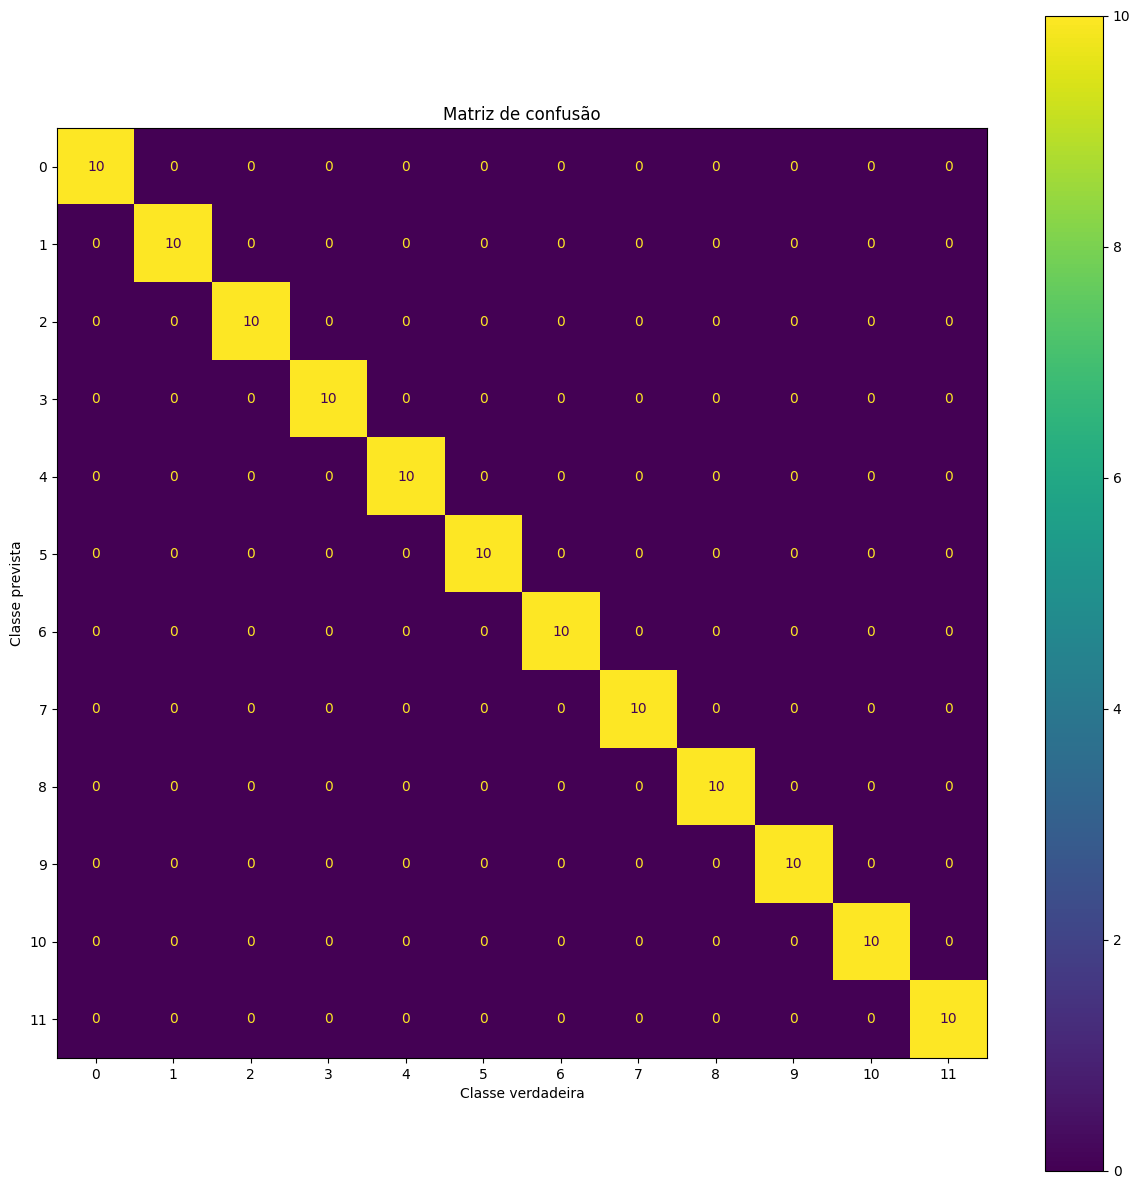

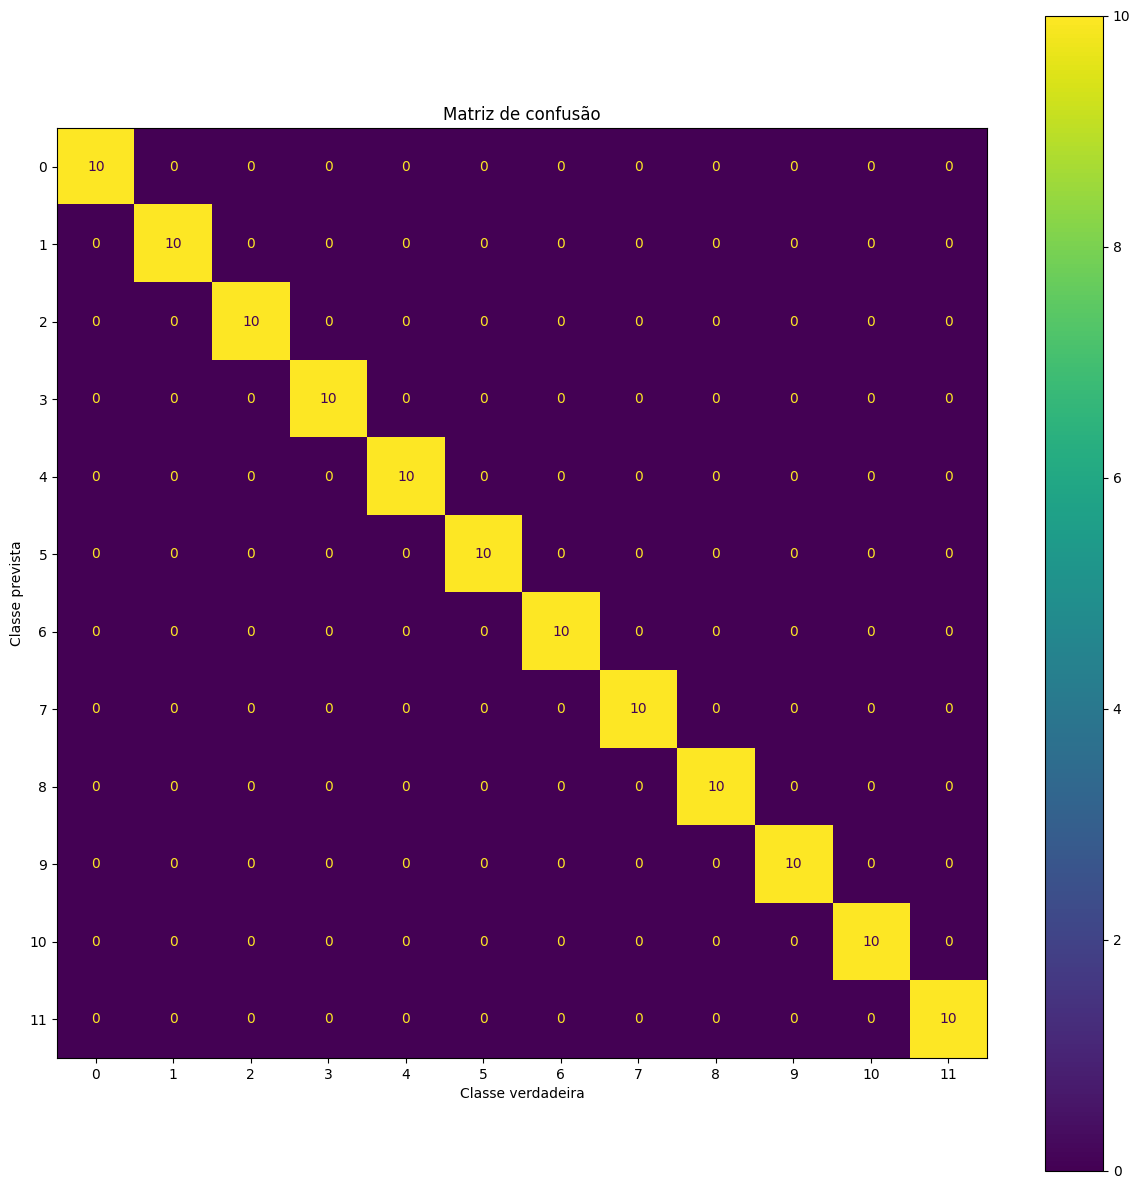

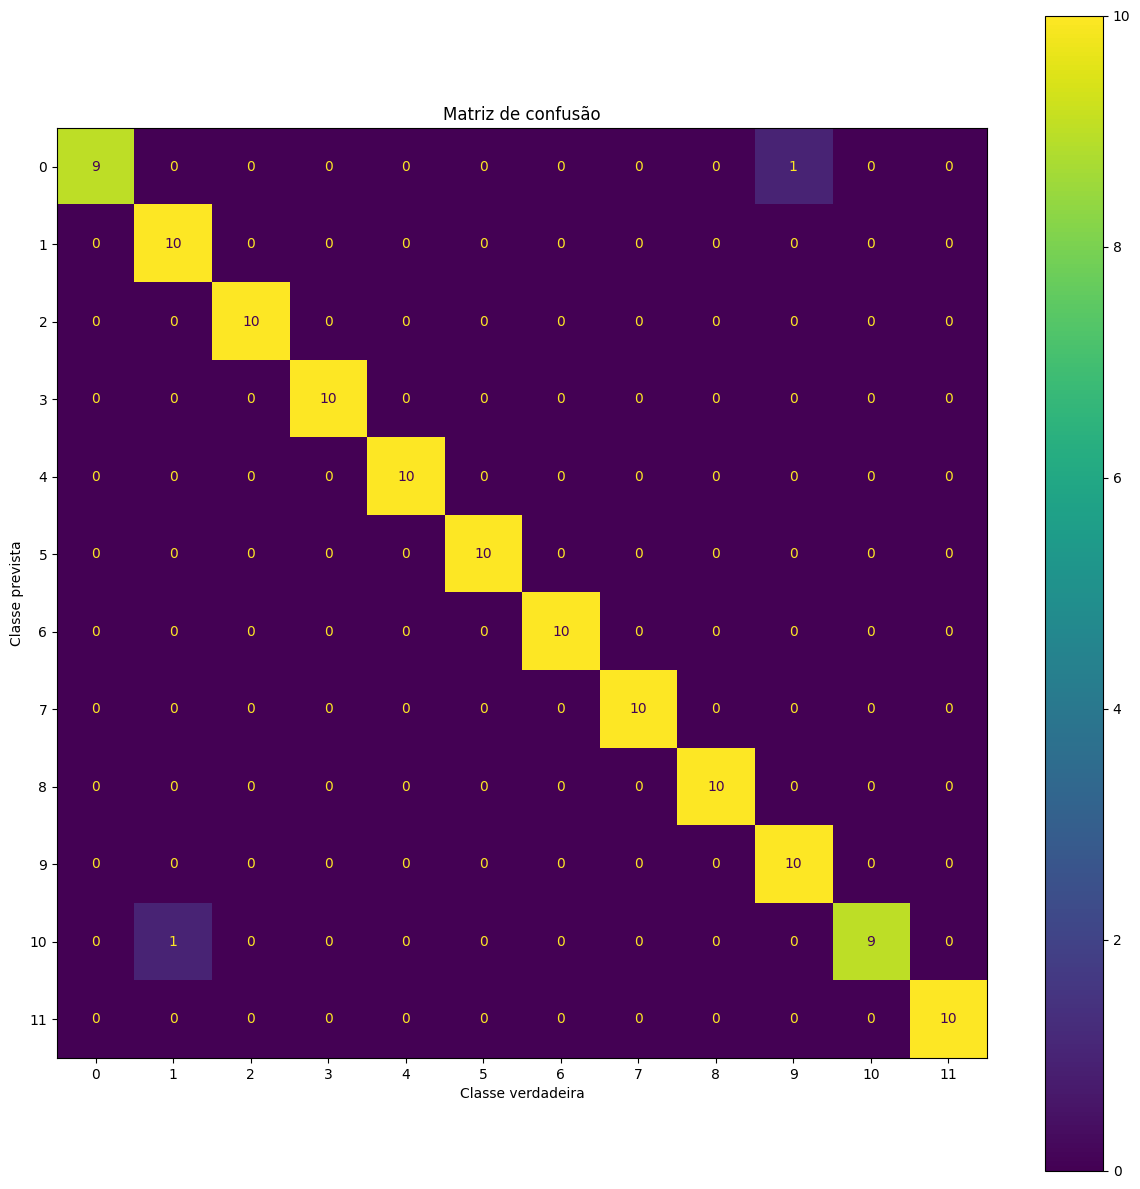

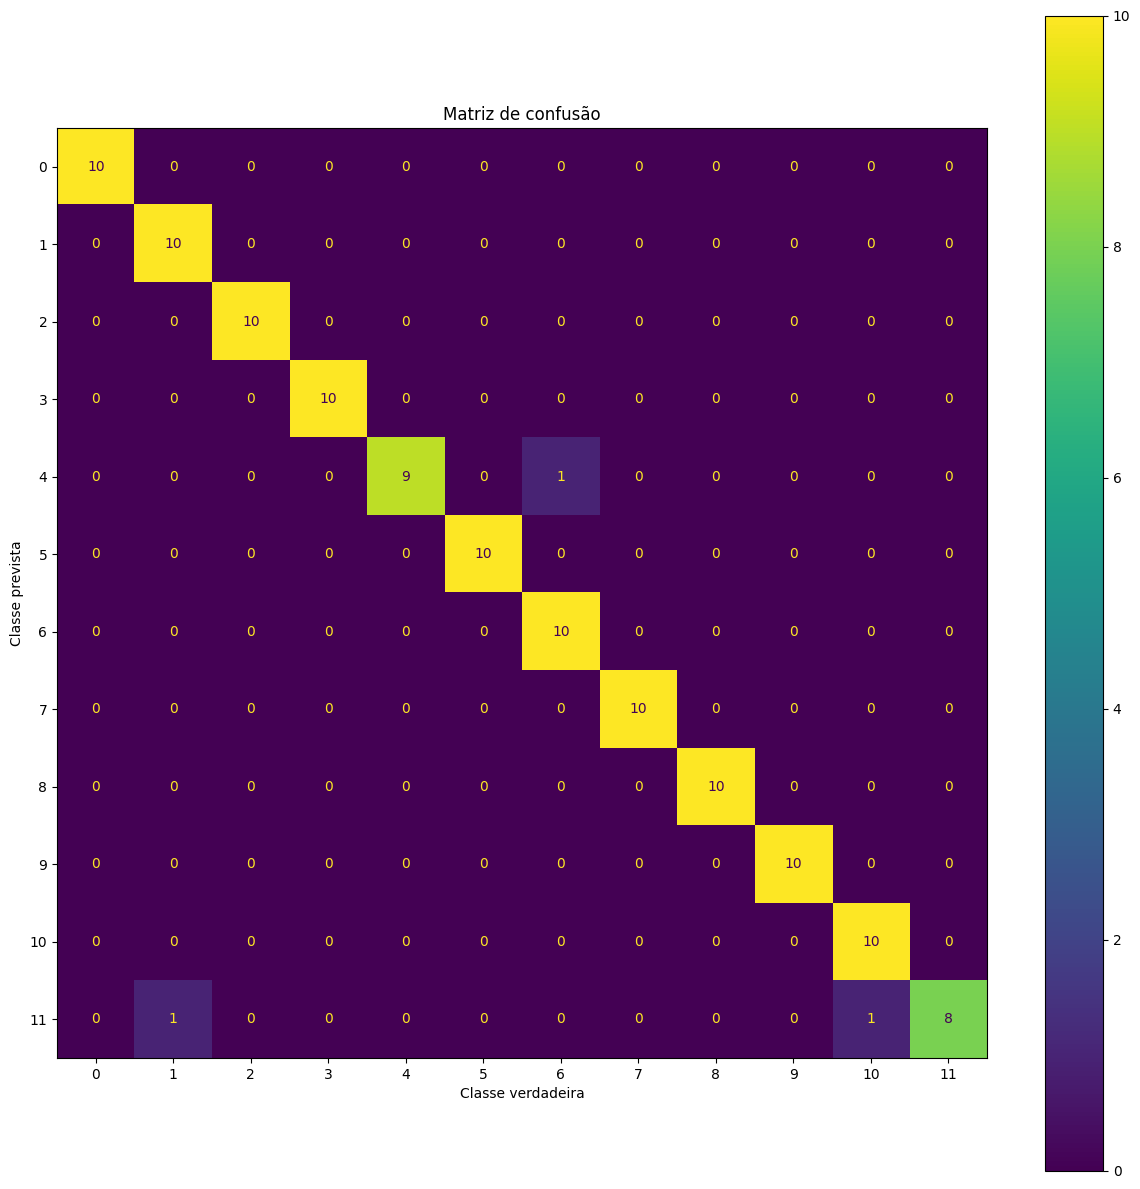

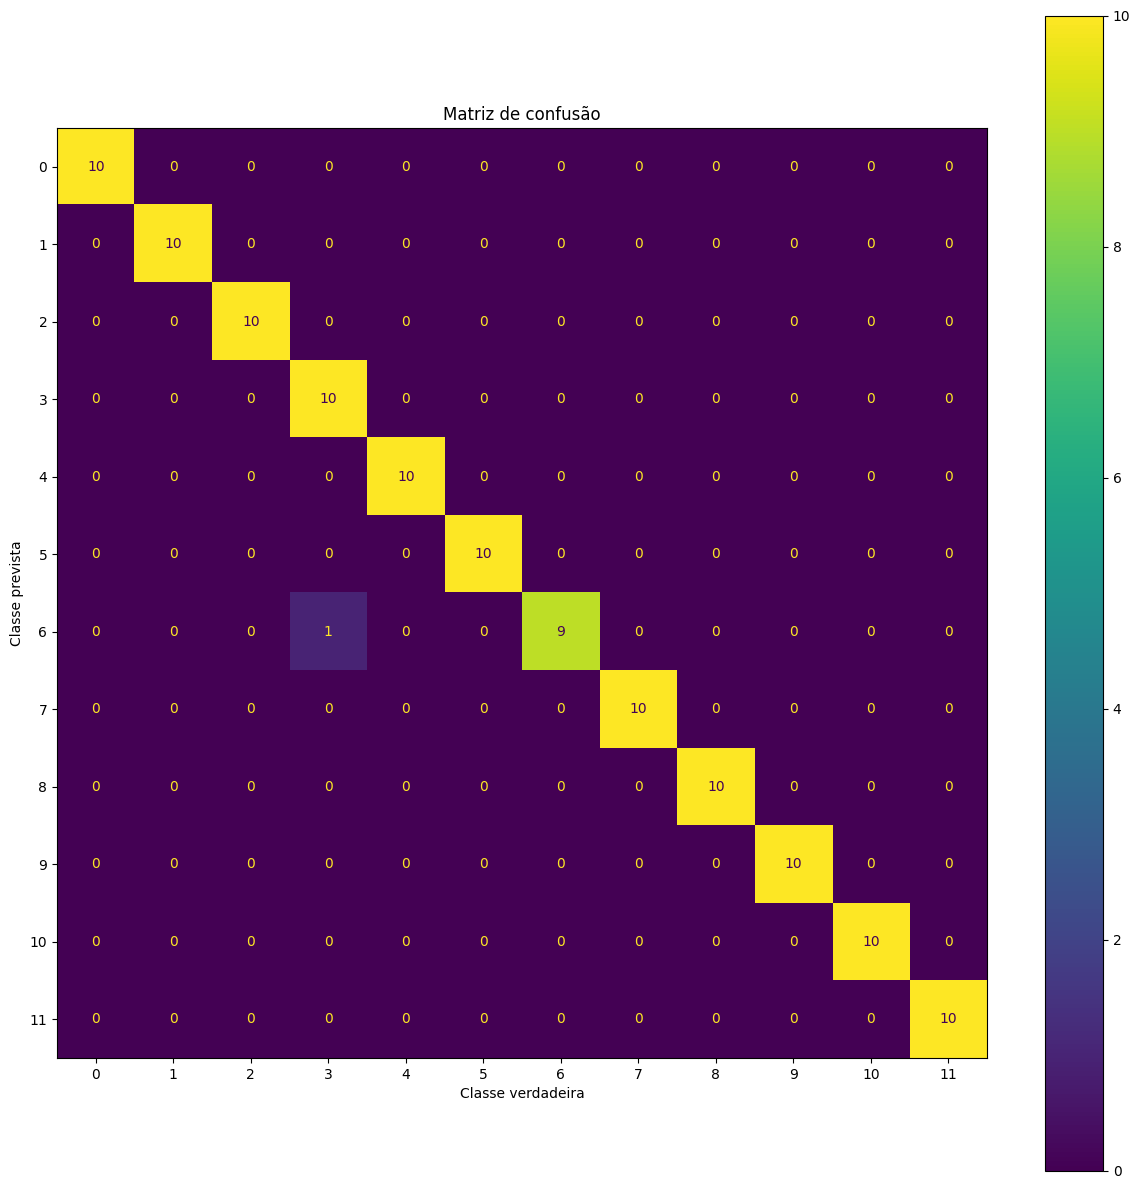

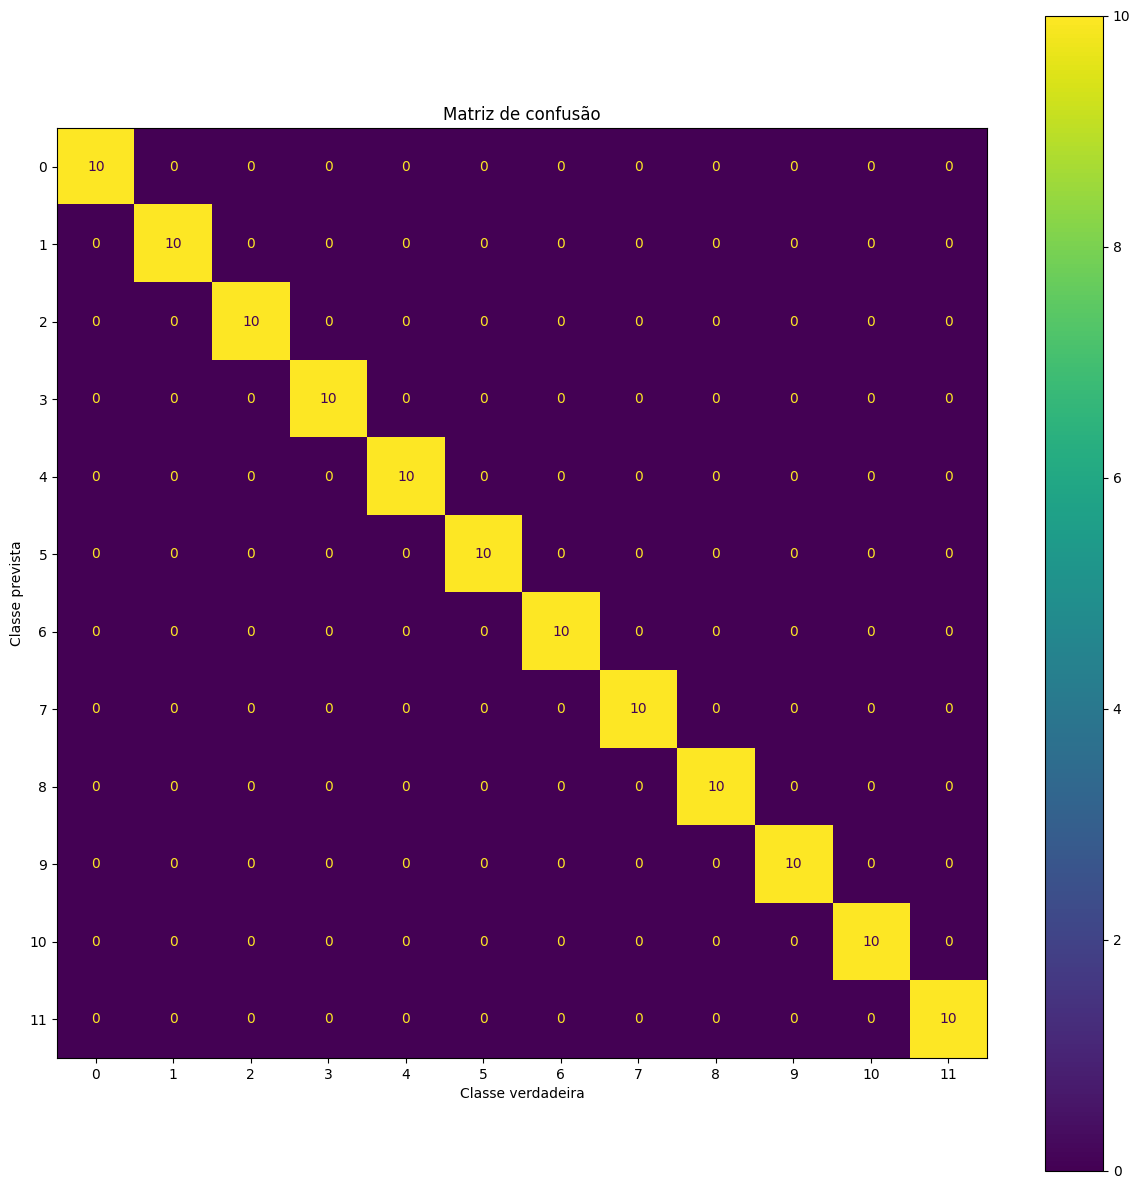

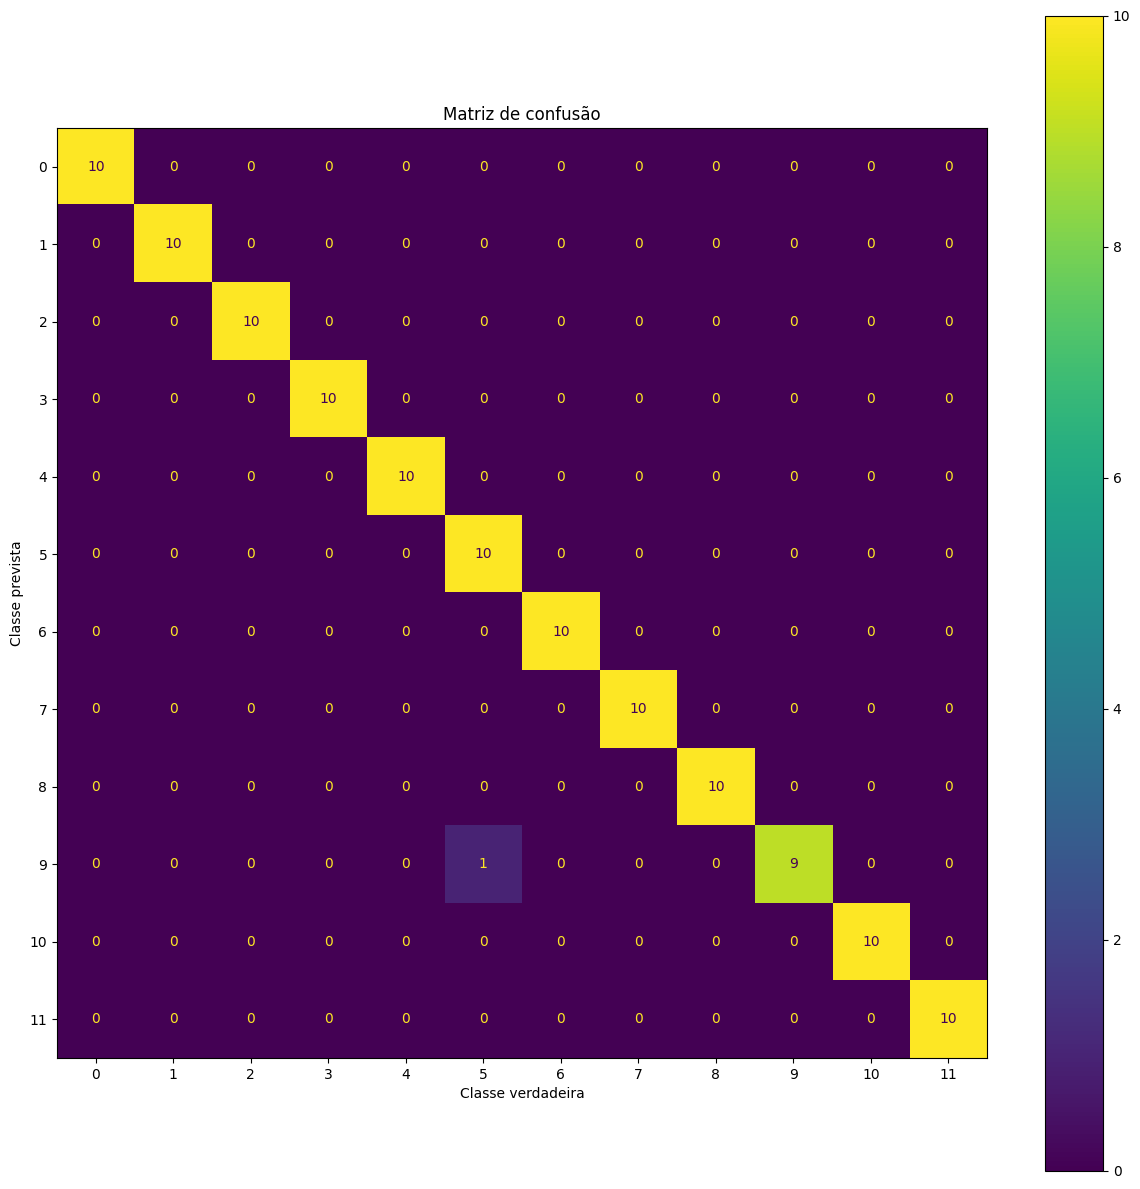

In [37]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    pred = clf.predict(X.iloc[test])
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ConfusionMatrixDisplay.from_predictions(y[test], pred, ax=ax)
    plt.title('Matriz de confusão')
    plt.xlabel('Classe verdadeira')
    plt.ylabel('Classe prevista')

# Tree regression

In [30]:
obj_columns = df.select_dtypes(['object']).columns
df_filter[obj_columns] = df_filter[obj_columns].apply(lambda x: pd.factorize(x)[0])
df_filter.describe()


X = df_filter.to_numpy()
y = df_filter.drop(columns = ['label']).to_numpy()
df_filter.head()

,N,P,K,label
0,90,42,43,0
1,85,58,41,0
2,60,55,44,0
3,74,35,40,0
4,78,42,42,0


In [31]:
clf = DecisionTreeRegressor()
kf = StratifiedKFold(n_splits=10, shuffle=True)

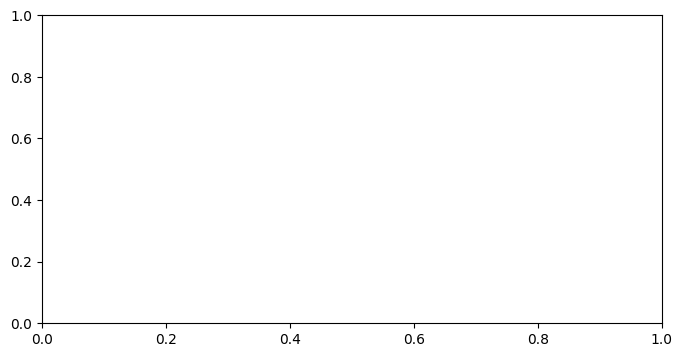

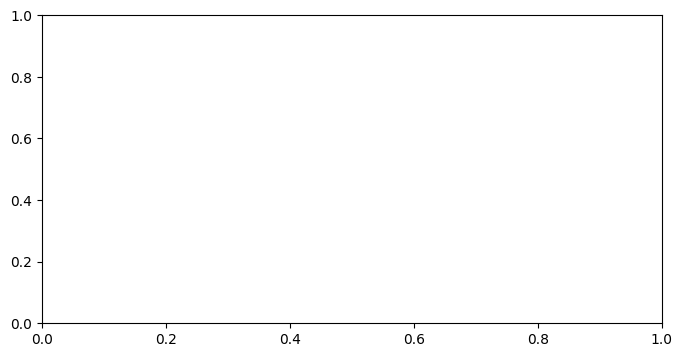

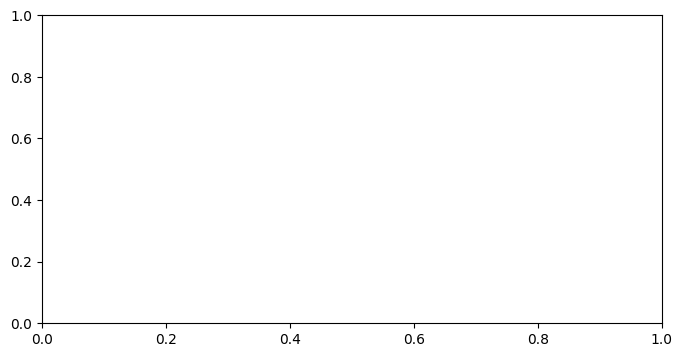

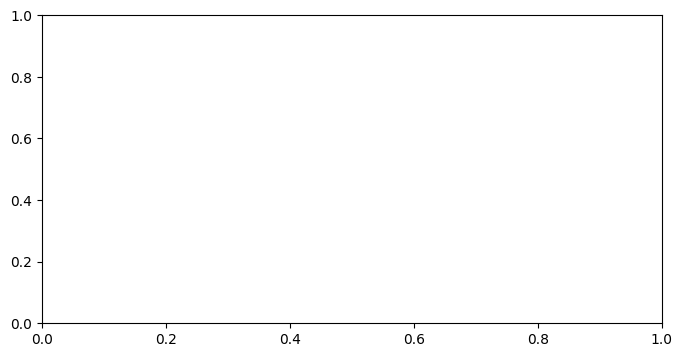

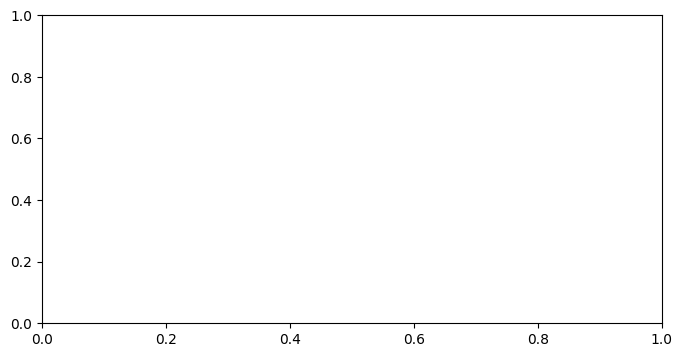

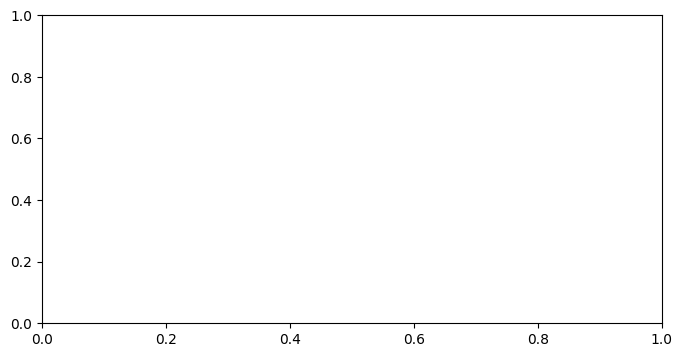

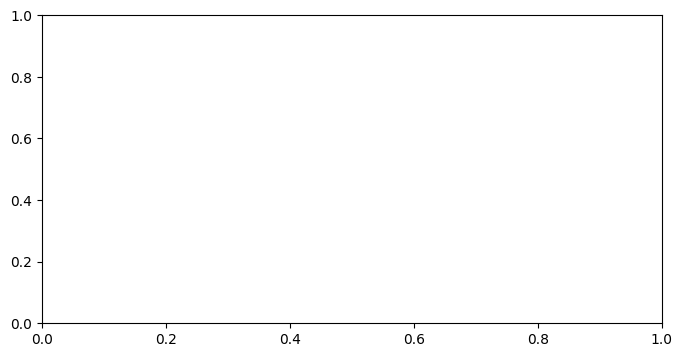

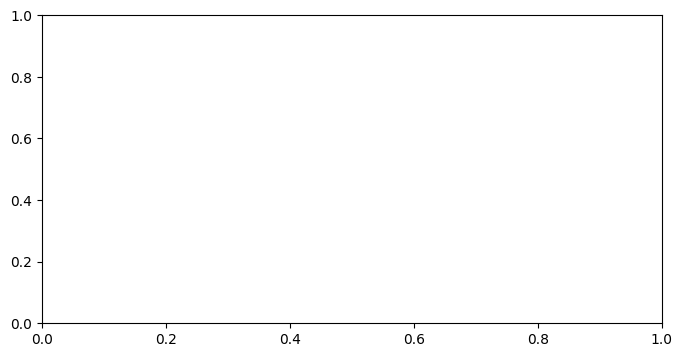

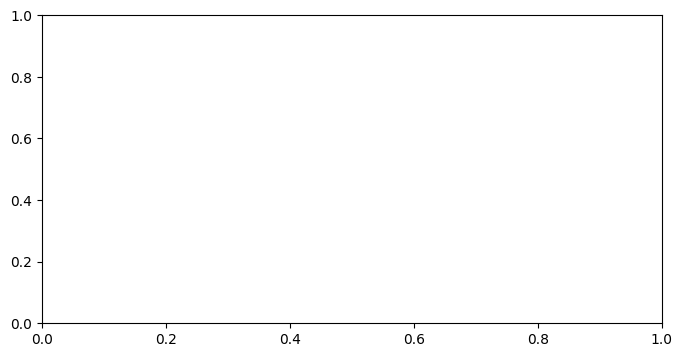

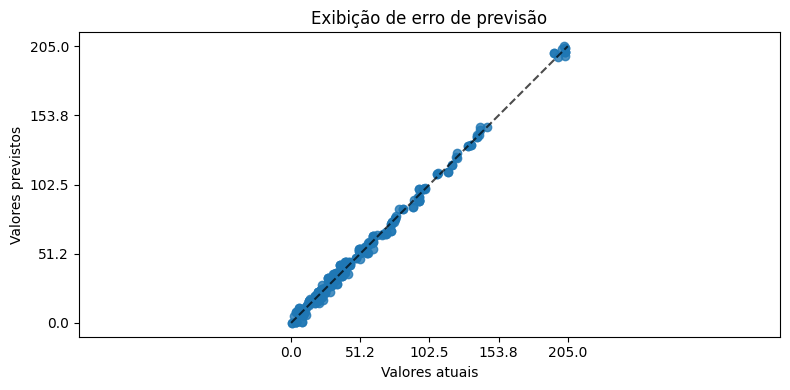

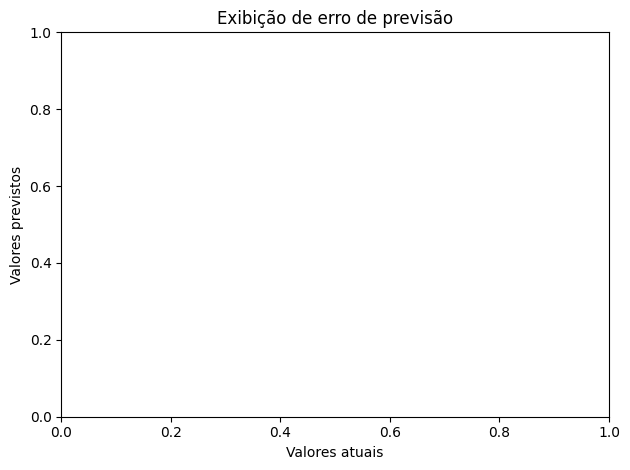

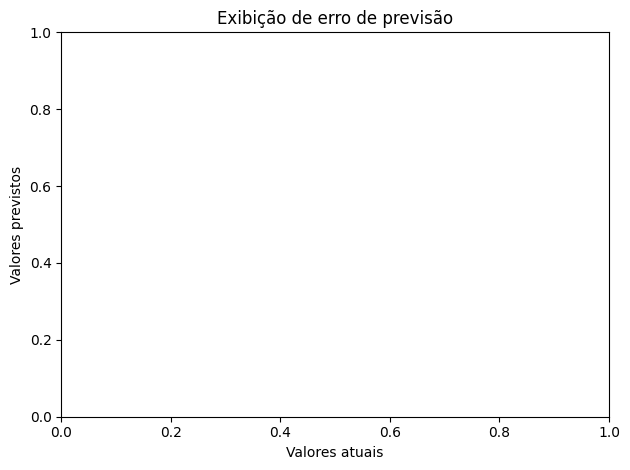

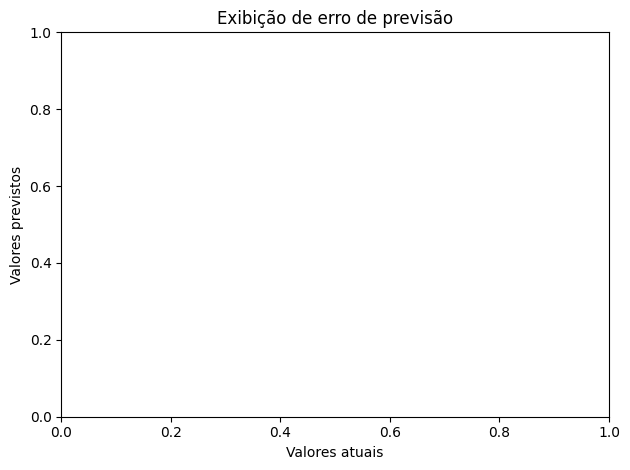

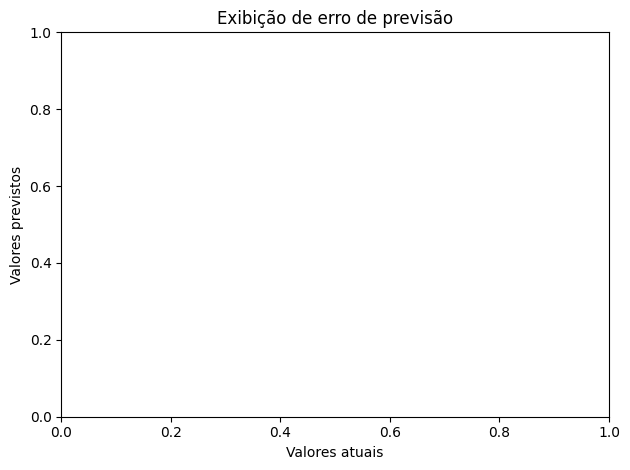

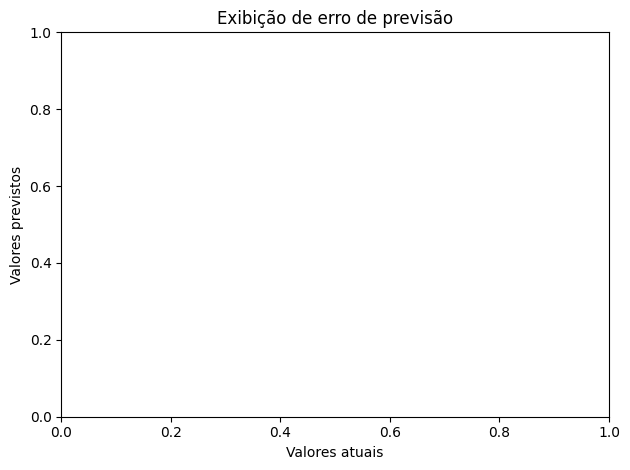

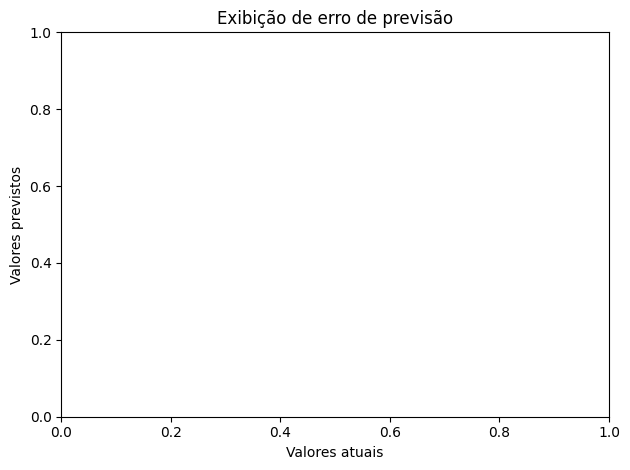

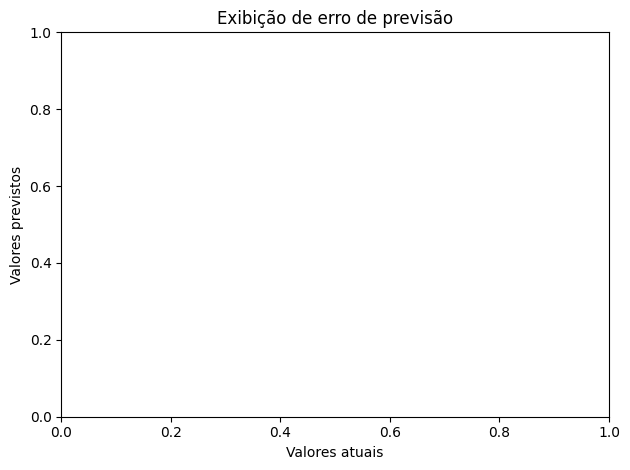

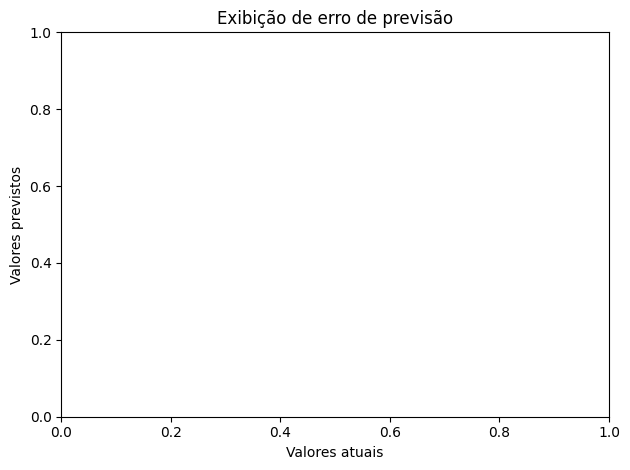

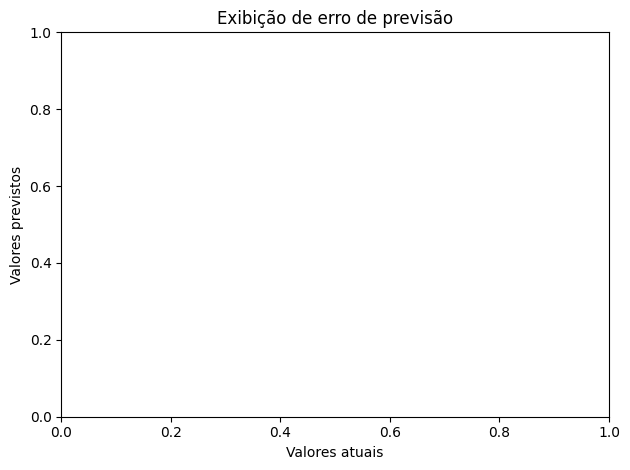

In [32]:
for fold, (train, test) in enumerate(kf.split(X, y.argmax(1))): 
    fig, ax = plt.subplots(figsize=(8, 4))

for fold, (train, test) in enumerate(kf.split(X, y.argmax(1))): 
    clf.fit(X[train], y[train])    
    y_pred = clf.predict(X[test])
    PredictionErrorDisplay.from_predictions(
        y[test],
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=100,
        ax=ax,
        random_state=0,
    )
    plt.title('Exibição de erro de previsão')
    plt.xlabel('Valores atuais')
    plt.ylabel('Valores previstos')
    plt.tight_layout()
    plt.show()